# Google Play Store EDA

[Google Play Store Dashboard](https://datastudio.google.com/s/qGCQq1wbFd4)

[Submit Form](https://docs.google.com/forms/d/e/1FAIpQLSfIX3BUFxr2DwR59lws8S5RsMAfv8lTb7k_ztuDrz5soWZDYQ/viewform)

In [2]:
from IPython.display import IFrame
IFrame('https://datastudio.google.com/embed/reporting/1GXPRZolva6sp22nDRyOfGYMhb9BQOQcE/page/QNfx', \
       width='867px', height='650px')

## Preparation

### Config & import tools

In [2]:
%config InlineBackend.figure_format ='retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [3]:
apps = pd.read_csv('google-play-store.csv')

### Reading dataset description

10k Play Store apps for analysing

**Columns**
1. App: *Application name*
2. Category: *Category the app belongs to*
3. Rating: *Overall user rating of the app (as when scraped)*
4. Reviews: *Number of user reviews for the app (as when scraped)*
5. Size: *Size of the app (as when scraped)*
6. Installs: *Number of user downloads/installs for the app (as when scraped)*
7. Type: *Paid or Free*
8. Price: *Price of the app (as when scraped)*
9. Content Rating: *Age group the app is targeted at - Children / Mature 21+ / Adult*
10. Genres: *An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.*
11. Last Updated: *Date when the app was last updated on Play Store (as when scraped)*
12. Current Ver: *Current version of the app available on Play Store (as when scraped)*
13. Android Ver: *Min required Android version (as when scraped)*

**Updated:** Sun Feb 03 2019 20:55:47 GMT+0700 (Indochina Time)

### Infomations

In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Look like most of columns does not belong to its type

In [6]:
apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7002,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997,Varies with device,"100,000+",Free,0,Everyone,Entertainment,"June 27, 2018",2.4,4.1 and up
1463,Living Smart Home,HOUSE_AND_HOME,4.6,39189,Varies with device,"1,000,000+",Free,0,Everyone,House & Home,"July 30, 2018",Varies with device,Varies with device
3350,Screen Off and Lock,TOOLS,4.1,172990,525k,"10,000,000+",Free,0,Everyone,Tools,"December 2, 2017",1.17.4,2.2 and up
10350,FE Connect Drive-Tech,BUSINESS,NaN,0,20M,100+,Free,0,Everyone,Business,"February 12, 2018",1.2.1.0,4.1 and up
6546,Badoo - Free Chat & Dating App,SOCIAL,4.3,3781467,Varies with device,"100,000,000+",Free,0,Mature 17+,Social,"August 2, 2018",Varies with device,Varies with device


It seems that:
- "Category", "Genres", "Type", "Content Rating", "Android Ver" should be categorical
- "Rating" already float and "Price" should be float
- "Size" seems a little bit tricky => float in MB
- "Reviews", "Installs" should be int
- Should we decode "Installs"?
- "Last Updated" should be date

## Cleaning Data

### Drop duplicated rows

Drop duplicates

In [7]:
apps.drop_duplicates(subset = None, keep = 'last', inplace = True)

Check for app name duplicated

In [8]:
apps[apps['App'].duplicated()].sort_values(by = 'App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
662,95Live -SG#1 Live Streaming App,DATING,4.1,4954,15M,"1,000,000+",Free,0,Teen,Dating,"August 1, 2018",8.7.2,4.2 and up
4991,A&E - Watch Full Episodes of TV Shows,FAMILY,4.0,29708,19M,"1,000,000+",Free,0,Teen,Entertainment,"July 16, 2018",3.1.4,4.4 and up
4928,AC - Tips & News for Android™,NEWS_AND_MAGAZINES,4.2,23291,14M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"May 24, 2018",3.1.12,4.1 and up


~700 rows, damn, thats a lot. So goodbye, duplicates!

In [9]:
apps.drop_duplicates(subset = ['App'], keep = 'last', inplace = True)

### Category column

In [10]:
# Cast category to category type
apps['Category'] = apps['Category'].astype('category')

In [11]:
apps['Category'].value_counts()

FAMILY                 1906
GAME                    926
TOOLS                   829
BUSINESS                419
MEDICAL                 396
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
ENTERTAINMENT            79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

### Reviews column

Reviews column should contains only number, so lets check for non-number chars

In [12]:
apps[apps['Reviews'].str.contains(r'\D')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Look at that row: the category, rating, size, installs,.... all columns seems so wrong?

Lets get rid of this meaningless row!

In [13]:
# Drop it cold-bloodly
apps.drop(10472, inplace=True)

Gotta cast 'em all!

In [14]:
apps['Reviews'] = apps['Reviews'].astype('int')

### Size column

In [15]:
apps['Size'].unique()

array(['19M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M', '28M',
       '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M',
       '14M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '24M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '46M', '51M', '48M', '8.5M', '41M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '8.4M', '118k', '44M', '695k', '1.6M', '18k', '53M',
     

They are in the format of MB (M,m) and KB (K,k) => lets go for MB (because KB is kinda small unit)

"Varies with device" hmm? Lets fill them with the mean value of size, after grouped by category? (i think that will be the best solution)

In [16]:
apps[apps['Size'].str.contains(r'[^MmKke]$', regex = True)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Just do some check if there are some strange value that did not get caught by my eyes heh.

Everything is allright, lets dig in

In [17]:
# Convert size to MB
apps['Size'] = apps['Size'].str.upper() \
                .replace('VARIES WITH DEVICE', np.nan) \
                .str.replace('+', '') \
                .str.replace(',', '')

apps['Size'] = apps['Size'].str.replace(r'[MK]', '', regex=True).astype(float) \
                / apps['Size'].str.extract(r'(K)', expand=False) \
                .fillna(1) \
                .replace('K', 1000) \
                .astype(float)

# Fill NA with mean value of category
apps['Size'].fillna(apps.groupby('Category')['Size'].transform('mean'), inplace = True)

# Cast to int
apps['Size'] = apps['Size'].astype('float')

### Installs column

In [18]:
apps['Installs'].unique()

array(['10,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+',
       '1,000,000+', '10,000,000+', '5,000+', '500,000+',
       '1,000,000,000+', '100,000,000+', '1,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '500,000,000+', '0+', '0'], dtype=object)

I think "Installs" can be categorical, right?

But since "Installs" is so important, like the main character in the movie, its represent the popular of the apps, so let just cast to int

In [19]:
apps['Installs'] = apps['Installs'].str.replace(r'[,+]','', regex=True)
apps['Installs'] = apps['Installs'].astype('int')

### Other columns

"Type" only contains "Free" and "Paid" am i right?

In [20]:
apps['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

Nan? Damn it

In [21]:
apps[apps['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,27.58204,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Look like another strange row has appeared. So goodbye you badluck-row!

In [22]:
apps.drop(9148, inplace=True)

In [23]:
# Cast type to categorical
apps['Type'] = apps['Type'].astype('category')

In [24]:
apps['Price'].unique()

array(['0', '$4.99', '$3.99', '$1.49', '$2.99', '$7.99', '$3.49', '$1.99',
       '$5.99', '$6.99', '$9.99', '$7.49', '$0.99', '$1.00', '$2.49',
       '$10.99', '$1.50', '$14.99', '$15.99', '$79.99', '$9.00', '$10.00',
       '$16.99', '$11.99', '$29.99', '$74.99', '$5.49', '$33.99',
       '$24.99', '$39.99', '$19.99', '$4.49', '$1.70', '$8.99', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$2.50', '$1.59', '$6.49',
       '$1.29', '$5.00', '$13.99', '$299.99', '$379.99', '$37.99',
       '$18.99', '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85',
       '$46.99', '$109.99', '$3.95', '$154.99', '$3.08', '$2.59', '$4.80',
       '$1.96', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04', '$12.99',
       '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95', '$2.90',
       '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Lets just remove the dollar-sign ($) and we are good to change type

In [25]:
# Cast price to float ($ unit)
apps['Price'] = apps['Price'] \
                .str.replace('$', '') \
                .astype('float')

I have an idea: these price in number cant speaking things, so i decide to handle them, like:

In [26]:
# Price banding
apps.loc[ apps['Price'] == 0, 'PriceBand'] = 'Free'
apps.loc[(apps['Price'] > 0) & (apps['Price'] <= 0.99), 'PriceBand'] = 'Cheap'
apps.loc[(apps['Price'] > 0.99) & (apps['Price'] <= 2.99), 'PriceBand']   = 'Not cheap'
apps.loc[(apps['Price'] > 2.99) & (apps['Price'] <= 4.99), 'PriceBand']   = 'Normal'
apps.loc[(apps['Price'] > 4.99) & (apps['Price'] <= 14.99), 'PriceBand']   = 'Expensive'
apps.loc[(apps['Price'] > 14.99) & (apps['Price'] <= 29.99), 'PriceBand']   = 'Too expensive'
apps.loc[(apps['Price'] > 29.99), 'PriceBand']  = 'Ridiculously expensive'

apps['PriceBand'] = apps['PriceBand'].astype('category')
apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriceBand
7074,WISE- MOBILE PORTAL,TOOLS,NaN,3,1.000,500,Free,0.0,Everyone,Tools,"July 30, 2015",1.0.0.4,2.2 and up,Free
8506,Dr. D.K. Olukoya Sermons,LIFESTYLE,NaN,1,3.000,100,Free,0.0,Everyone,Lifestyle,"September 26, 2017",1.0,4.0 and up,Free
10732,Draw with FP sDraw,TOOLS,4.3,3268,0.467,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up,Free
7213,Placement Tips for BE (CE/IT),FAMILY,4.4,7,6.300,500,Free,0.0,Everyone,Education,"June 24, 2016",1.4,4.0 and up,Free
6901,BW-Joseki,GAME,4.7,705,1.800,10000,Free,0.0,Everyone,Board,"July 28, 2015",1.2.1,4.0.3 and up,Free


In [27]:
apps['Content Rating'].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [28]:
# Cast content rating to categorical
apps['Content Rating'] = apps['Content Rating'].astype('category')

In [29]:
# Cast last update to date
apps['Last Updated'] = apps['Last Updated'].astype('datetime64[ns]')

In [30]:
apps['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [31]:
# Cast android version to categorical
apps['Android Ver'] = apps['Android Ver'].astype('category')

In [32]:
apps['Genres'].unique()

array(['Art & Design', 'Art & Design;Creativity', 'Auto & Vehicles',
       'Beauty', 'Books & Reference', 'Business', 'Comics',
       'Comics;Creativity', 'Communication', 'Dating', 'Education',
       'Education;Creativity', 'Education;Education',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Puzzle', 'Racing',
       'Sports', 'Casual', 'Arcade', 'Trivia', 'Simulation', 'Action',
       'Word', 'Role Playing', 'Strategy', 'Board',
       'Simulation;Education', 'Adventure', 'Card',
       'Action;Action & Adventure', 'Music', 'Casual;Brain Games',
       'Educational;Creativity', 'Puzzle;Brain Games',
       'Educational;Education', 'Card;Brain Games', 'Casual;Pretend Play',
       'Educational;Brain Games', 

Hmm, multiple genres huh? What should we do? Use a ralational-db?

In [33]:
apps[apps['Genres'].str.contains(';')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriceBand
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,100000,Free,0.00,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Free
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.100000,10000,Free,0.00,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up,Free
26,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25.000000,500000,Free,0.00,Everyone,Art & Design;Creativity,2017-10-11,1.0.8,4.0.3 and up,Free
43,Paint Splash!,ART_AND_DESIGN,3.8,2206,1.200000,100000,Free,0.00,Everyone,Art & Design;Creativity,2018-04-15,1.46,4.1 and up,Free
301,Unicorn Pokez - Color By Number,COMICS,4.8,516,12.000000,50000,Free,0.00,Everyone,Comics;Creativity,2018-08-03,1.0.6,4.4 and up,Free
711,Mermaids,EDUCATION,4.2,14286,18.183974,5000000,Free,0.00,Everyone,Education;Creativity,2018-04-26,Varies with device,4.1 and up,Free
712,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,26.000000,1000000,Free,0.00,Everyone,Education;Education,2018-07-20,2.16.11.10,4.2 and up,Free
715,Dinosaurs Coloring Pages,EDUCATION,4.4,390,41.000000,500000,Free,0.00,Everyone,Education;Education,2018-02-03,1.1.6,4.0 and up,Free
716,Cars Coloring Pages,EDUCATION,4.4,1090,49.000000,1000000,Free,0.00,Everyone,Education;Creativity,2018-02-03,1.2.0,4.0 and up,Free
728,Free intellectual training game application |,EDUCATION,4.2,5741,84.000000,1000000,Free,0.00,Everyone,Education;Pretend Play,2018-07-25,3.7.0,4.4 and up,Free


There are meaningless sub genres like: "Education;Education"? What?

So i decide to elimnate these sub-genres after the ;

Then make them categorical

In [34]:
apps['Genres'] = apps['Genres'].str.split(';').str[0].astype('category')

In [35]:
apps['Genres'].value_counts()

Tools                      829
Entertainment              592
Education                  580
Business                   419
Medical                    396
Personalization            376
Productivity               374
Lifestyle                  370
Finance                    345
Sports                     335
Communication              317
Action                     311
Health & Fitness           289
Photography                281
News & Magazines           254
Social                     239
Books & Reference          225
Casual                     224
Travel & Local             219
Simulation                 206
Shopping                   202
Arcade                     200
Dating                     170
Video Players & Editors    165
Puzzle                     142
Maps & Navigation          131
Role Playing               115
Food & Drink               112
Racing                     108
Educational                102
Strategy                    98
Auto & Vehicles             85
Librarie

Beautiful, but look at the end of the list..

There is just 1 app fall in the genre of "Music & Audio" so i decide to merge it with "Music"

In [36]:
apps['Genres'].replace('Music & Audio', 'Music',inplace = True)

## Double-Check

In [37]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10840
Data columns (total 14 columns):
App               9658 non-null object
Category          9658 non-null category
Rating            8196 non-null float64
Reviews           9658 non-null int64
Size              9658 non-null float64
Installs          9658 non-null int64
Type              9658 non-null category
Price             9658 non-null float64
Content Rating    9658 non-null category
Genres            9658 non-null category
Last Updated      9658 non-null datetime64[ns]
Current Ver       9650 non-null object
Android Ver       9656 non-null category
PriceBand         9658 non-null category
dtypes: category(6), datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 741.0+ KB


"Rating" can contains nan value because there are apps that didnt receive any review form users or they just dont have any user (sadly)

But "Android Ver", "Current" cannot contains nan value, so:

In [38]:
apps['Current Ver'].fillna('1.0', inplace=True)
apps['Android Ver'].fillna('1.5 and up', inplace=True)

### Export to csv

In [39]:
apps.to_csv('google-play-store-cleanned.csv')

## Analysis Data

In [40]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10840
Data columns (total 14 columns):
App               9658 non-null object
Category          9658 non-null category
Rating            8196 non-null float64
Reviews           9658 non-null int64
Size              9658 non-null float64
Installs          9658 non-null int64
Type              9658 non-null category
Price             9658 non-null float64
Content Rating    9658 non-null category
Genres            9658 non-null category
Last Updated      9658 non-null datetime64[ns]
Current Ver       9658 non-null object
Android Ver       9658 non-null category
PriceBand         9658 non-null category
dtypes: category(6), datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 741.0+ KB


In [41]:
apps.describe()

,Rating,Reviews,Size,Installs,Price
count,8196.000000,9.658000e+03,9658.000000,9.658000e+03,9658.000000
mean,4.173219,2.166737e+05,20.157183,7.795055e+06,1.097344
std,0.536269,1.830831e+06,20.611775,5.377264e+07,16.852487
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,13.067351,1.000000e+05,0.000000
75%,4.500000,2.940800e+04,27.000000,1.000000e+06,0.000000
max,5.000000,7.812821e+07,100.000000,1.000000e+09,400.000000


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.055137,0.058809,0.040221,-0.021102
Reviews,0.055137,1.000000,0.074758,0.625029,-0.007589
Size,0.058809,0.074758,1.000000,0.040413,-0.021509
Installs,0.040221,0.625029,0.040413,1.000000,-0.009407
Price,-0.021102,-0.007589,-0.021509,-0.009407,1.000000


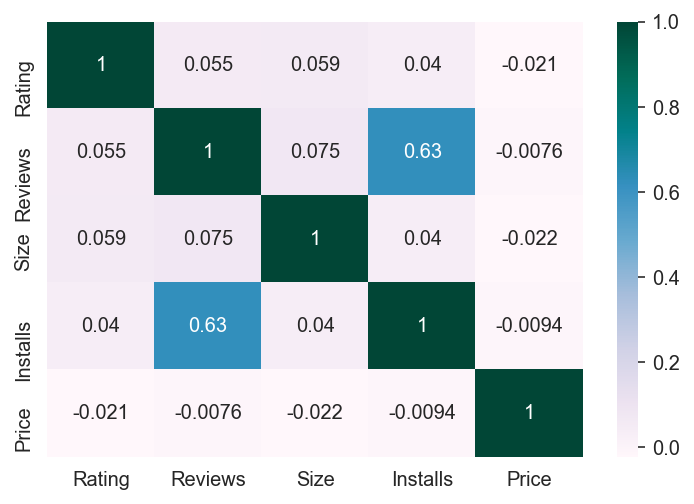

In [42]:
apps.corr()
sns.heatmap(apps.corr(), annot=True, cmap='PuBuGn')

Looks like only installs and reviews seem related: the higher installs, the higher reivews.

Note that installs and review doesnt affect rating at all.

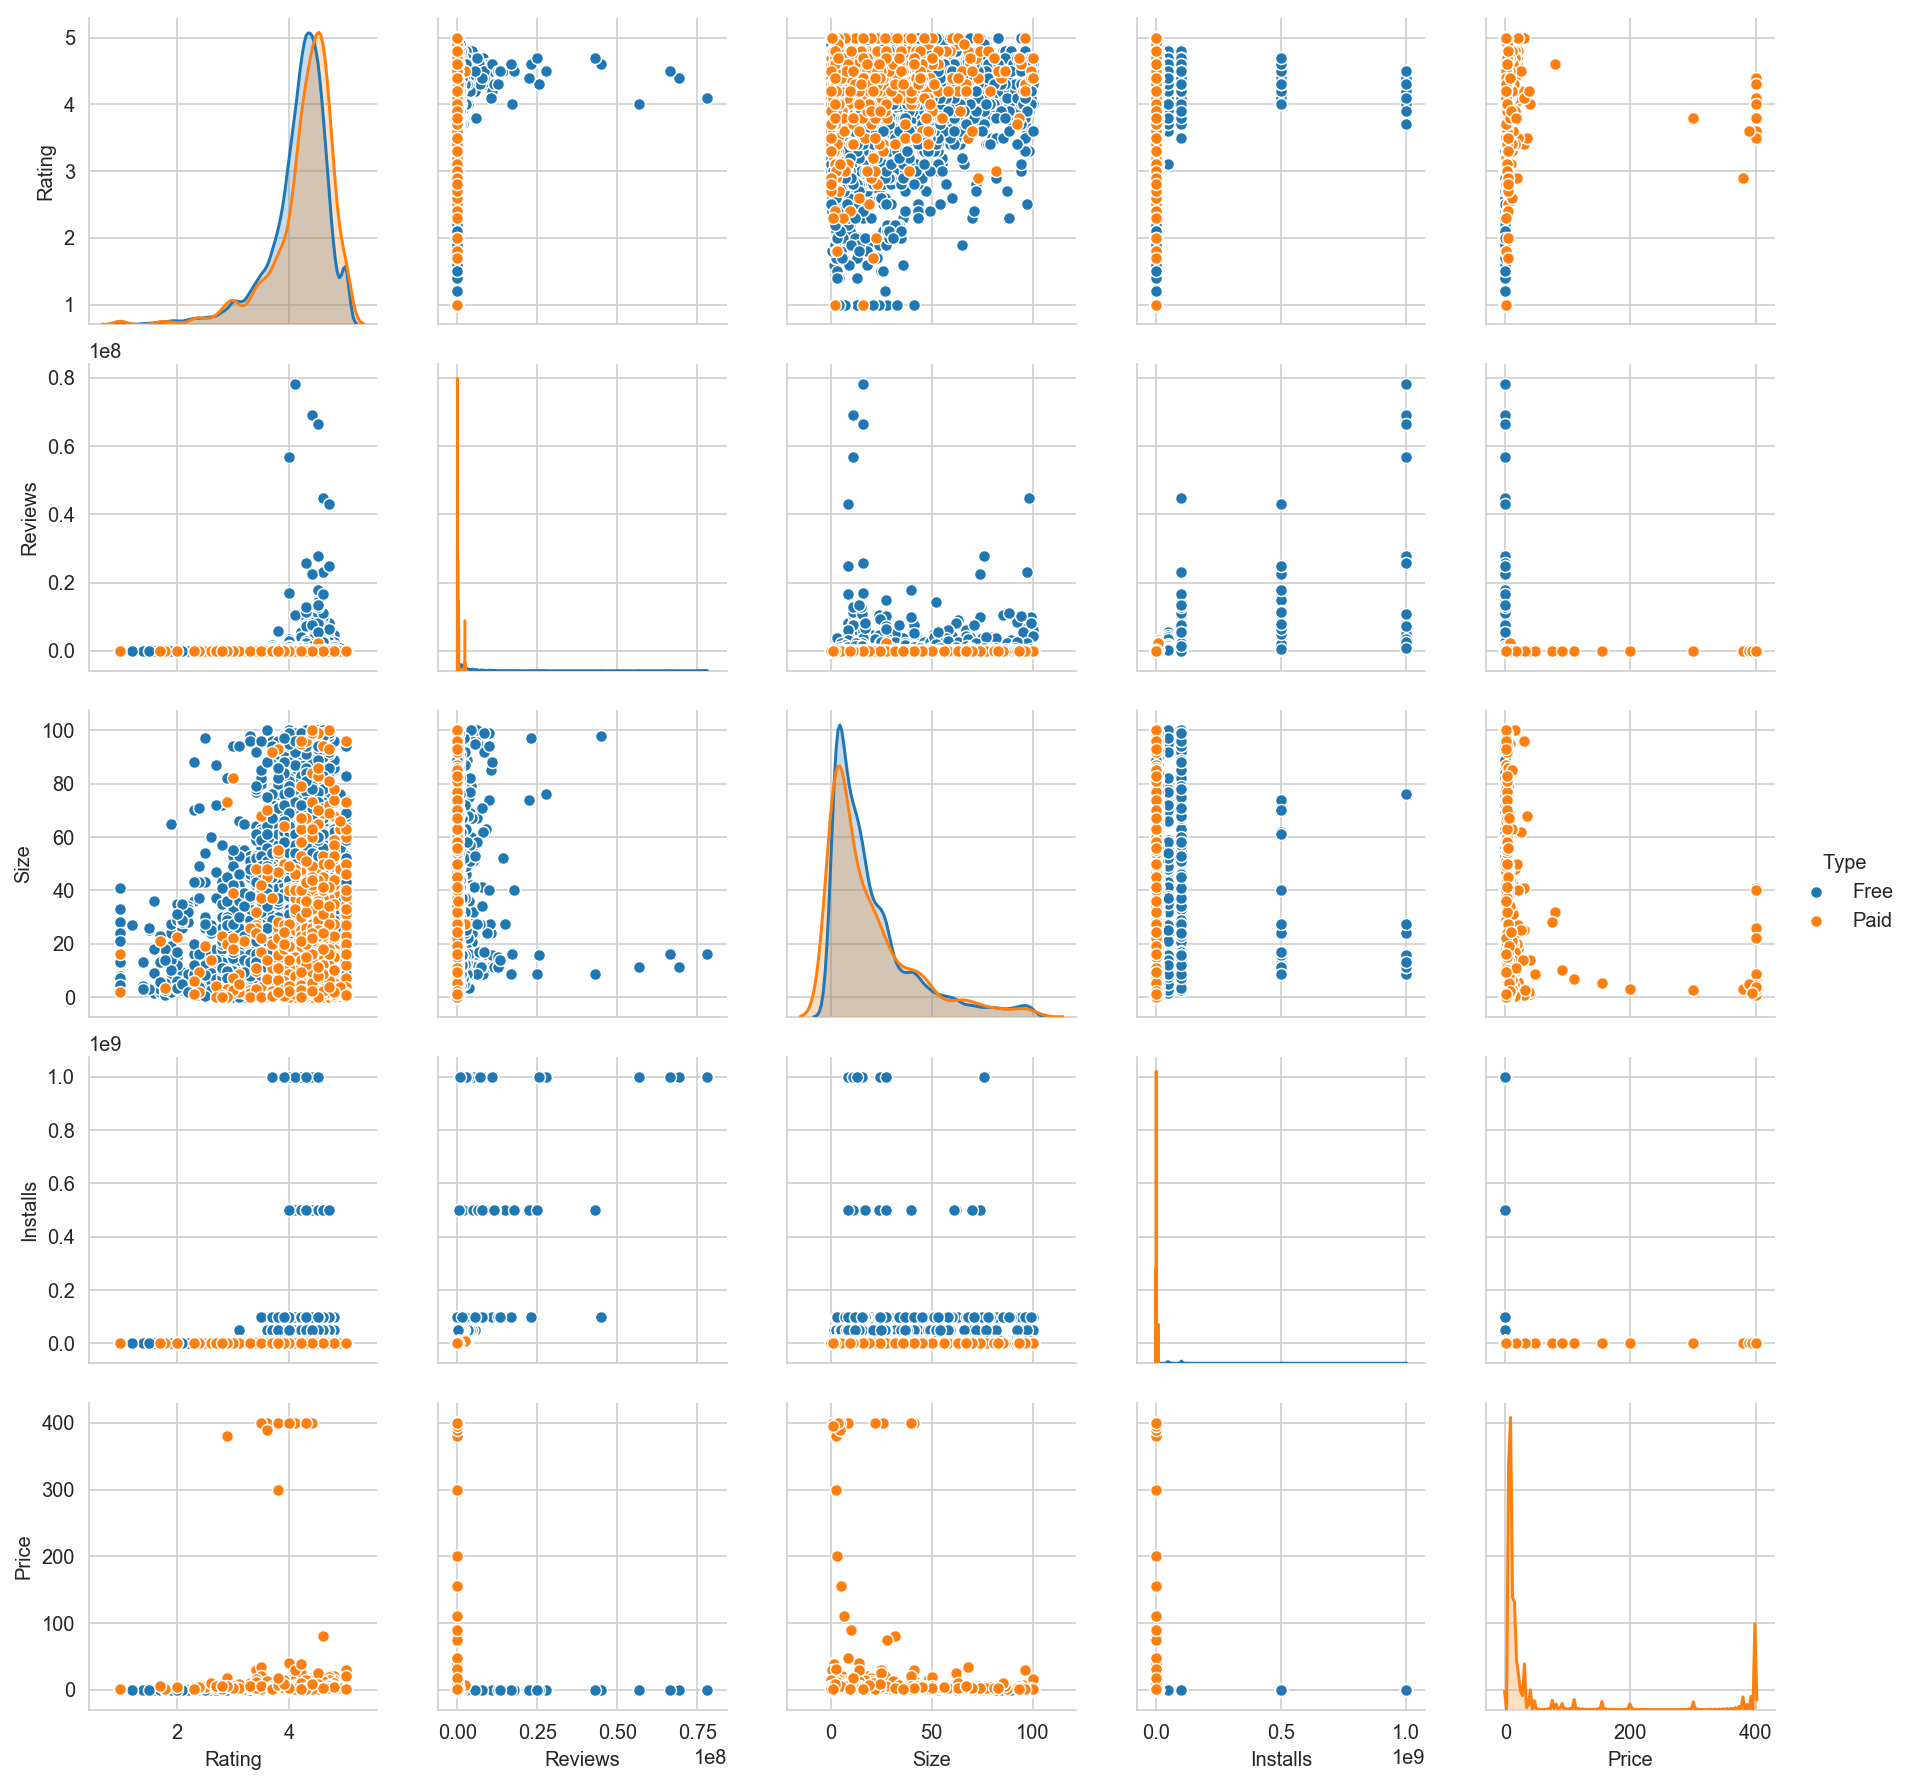

In [43]:
sns.pairplot(data = apps, hue = 'Type')

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a18e9de10>)

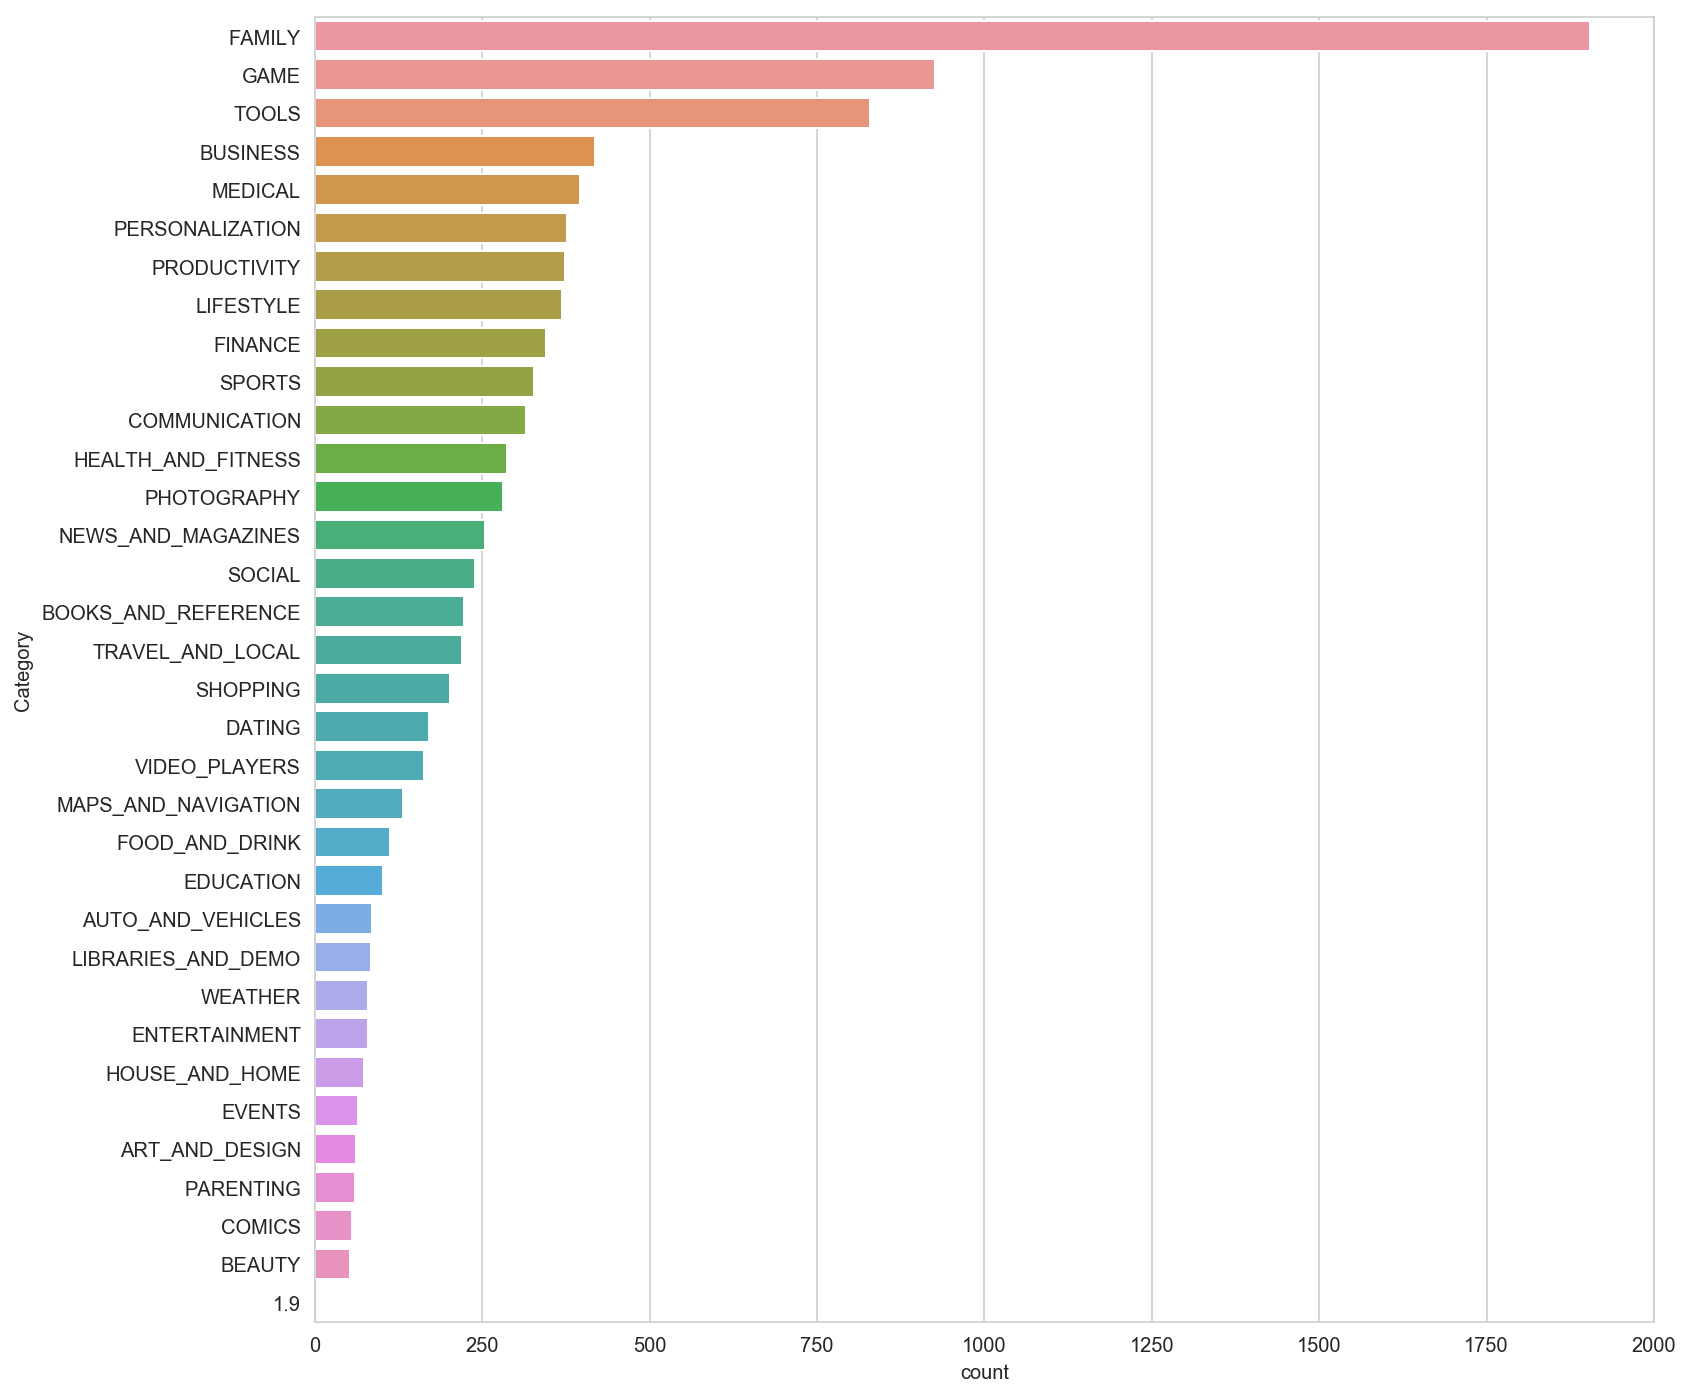

In [44]:
plt.subplots(figsize=(12,12))
sns.countplot(y='Category', data=apps, order = apps['Category'].value_counts().index)

Game, Family and Tools category are the most appearances for application in store

## Insights

There are 4 types of data in this dataset:

- Nominal: type, category, genre, content rating
- Ordinal: price-band
- Interval: rating
- Ratio: installs, reviews, size, price

### Rating

count    8196.000000
mean        4.173219
std         0.536269
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

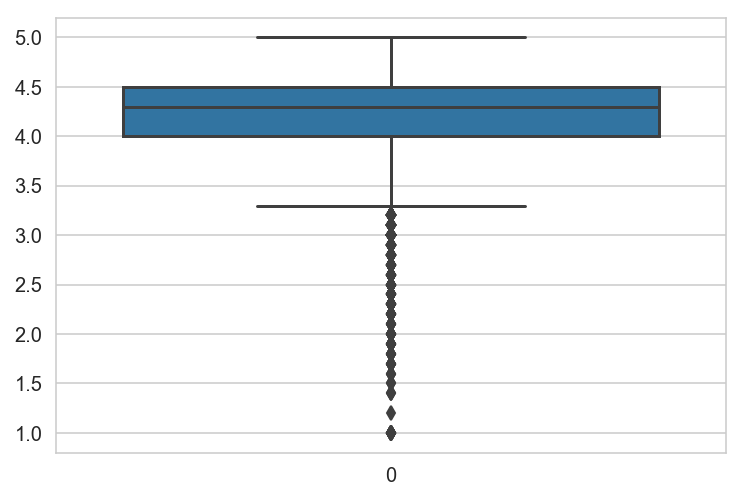

In [127]:
apps['Rating'].describe()
sns.boxplot(data=apps['Rating'])

There are 10% apps which doesnt have rating

The average rating of all is 4.1 and most of apps has been rated 4.5/5, which is very high

### Reviews

In [131]:
apps['Reviews'].describe()

count    9.658000e+03
mean     2.166737e+05
std      1.830831e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.690000e+02
75%      2.940800e+04
max      7.812821e+07
Name: Reviews, dtype: float64

There are 592/9658 (6%) apps hasnt receive any reviews, most of them has less than 29408 reviews, but some of them (outliners) has more than 1,000,000 reviews or even 10,000,000 reviews, and the maximum of 78,128,208

### Size

count    9658.000000
mean       20.157183
std        20.611775
min         0.008500
25%         5.300000
50%        13.067351
75%        27.000000
max       100.000000
Name: Size, dtype: float64

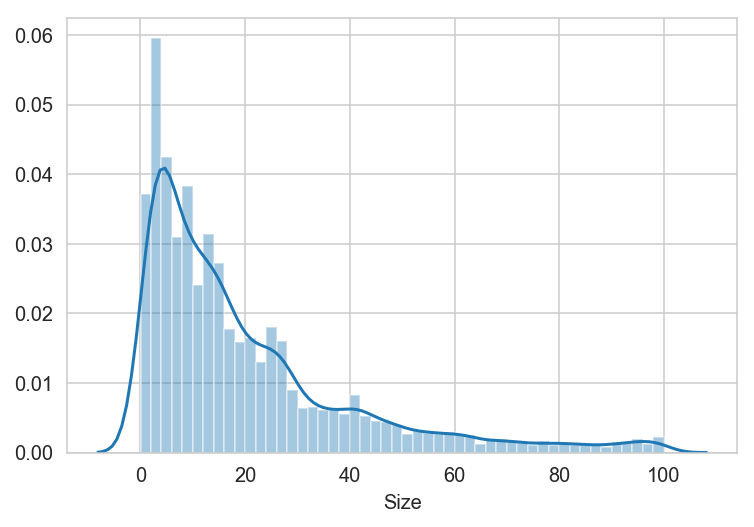

In [141]:
apps['Size'].describe()
sns.distplot(apps['Size'])

Apps have the average size of 20MB, the smallest apps just cost 0.5KB to stored and the largest app need 100MB

### Installs

In [136]:
apps['Installs'].describe()
apps['Installs'].value_counts()

count    9.658000e+03
mean     7.795055e+06
std      5.377264e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

1000000       1419
100000        1114
10000         1031
10000000       933
1000           887
100            709
5000000        607
500000         504
50000          469
5000           468
10             385
500            328
50000000       204
50             204
100000000      189
5               82
1               67
500000000       24
1000000000      20
0               14
Name: Installs, dtype: int64

Installs is a little bit tricky because it can be ratio, and categorical at the same time hmm

There are 20 values:

1. 0: 14
2. 1: 67
3. 5: 82
4. 10: 385
5. 50: 204
6. 100: 709
7. 500: 328
8. 1,000: 887
9. 5,000: 468
10. 10,000: 1031
11. 50,000: 469
12. 100,000: 1114
13. 500,000: 504
14. 1,000,000: 1419
15. 5,000,000: 607
16. 10,000,000: 189
17. 50,000,000: 204
18. 100,000,000: 189
19. 500,000,000: 24
20. 1,000,000,000: 20

### Price

In [137]:
apps[apps['Price'] != 0]['Price'].describe()

count    754.000000
mean      14.055902
std       58.821000
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

Free app excluded: average: 14 dollar, this is meaningless because most of them < 4.99, and some of them is ridiculously expensive (the max of 400, what?)

In [142]:
apps[apps['Price'] > 200].sort_values(by="Price", ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriceBand,Last Updated In,Words
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,Ridiculously expensive,9,< 10
4197,most expensive app (H),FAMILY,4.3,6,1.500,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up,Ridiculously expensive,6,< 5
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,Ridiculously expensive,10,< 5
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41.000,1000,Paid,399.99,Everyone,Finance,2018-06-25,1.0.2,4.1 and up,Ridiculously expensive,7,< 10
5369,I am Rich,FINANCE,4.3,180,3.800,5000,Paid,399.99,Everyone,Finance,2018-03-22,1.0,4.2 and up,Ridiculously expensive,10,< 5
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.700,1000,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up,Ridiculously expensive,14,< 10
5362,I Am Rich Pro,FAMILY,4.4,201,2.700,5000,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up,Ridiculously expensive,20,< 5
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up,Ridiculously expensive,21,< 5
5358,I am Rich!,FINANCE,3.8,93,22.000,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up,Ridiculously expensive,13,< 5
5356,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,Ridiculously expensive,14,< 5


Look at their names: Rich this, rich that... Ok cool, so people intall them just to show that they are rich =))

## How to get higher installs on Play Store?

We known that Game and Family category are the most appearances, but do people actually use them?

In [45]:
top_installs = apps.groupby(by = 'Category').sum().sort_values(by='Installs')
top_installs

,Rating,Reviews,Size,Installs,Price
Category,,,,,
1.9,0.0,0,0.000000,0,0.00
EVENTS,199.6,161018,893.680281,15973161,109.99
BEAUTY,179.7,396240,731.174468,27197050,0.00
PARENTING,215.0,958331,1350.777778,31521110,9.58
MEDICAL,1213.3,1287083,7580.876976,39203077,982.71
COMICS,225.8,2342399,772.517714,44981150,0.00
LIBRARIES_AND_DEMO,267.4,906846,890.642148,52995910,0.99
AUTO_AND_VEHICLES,305.9,1163666,1703.157467,53130211,13.47
HOUSE_AND_HOME,252.6,1929789,1182.667016,97202461,0.00


(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1b411c50>)

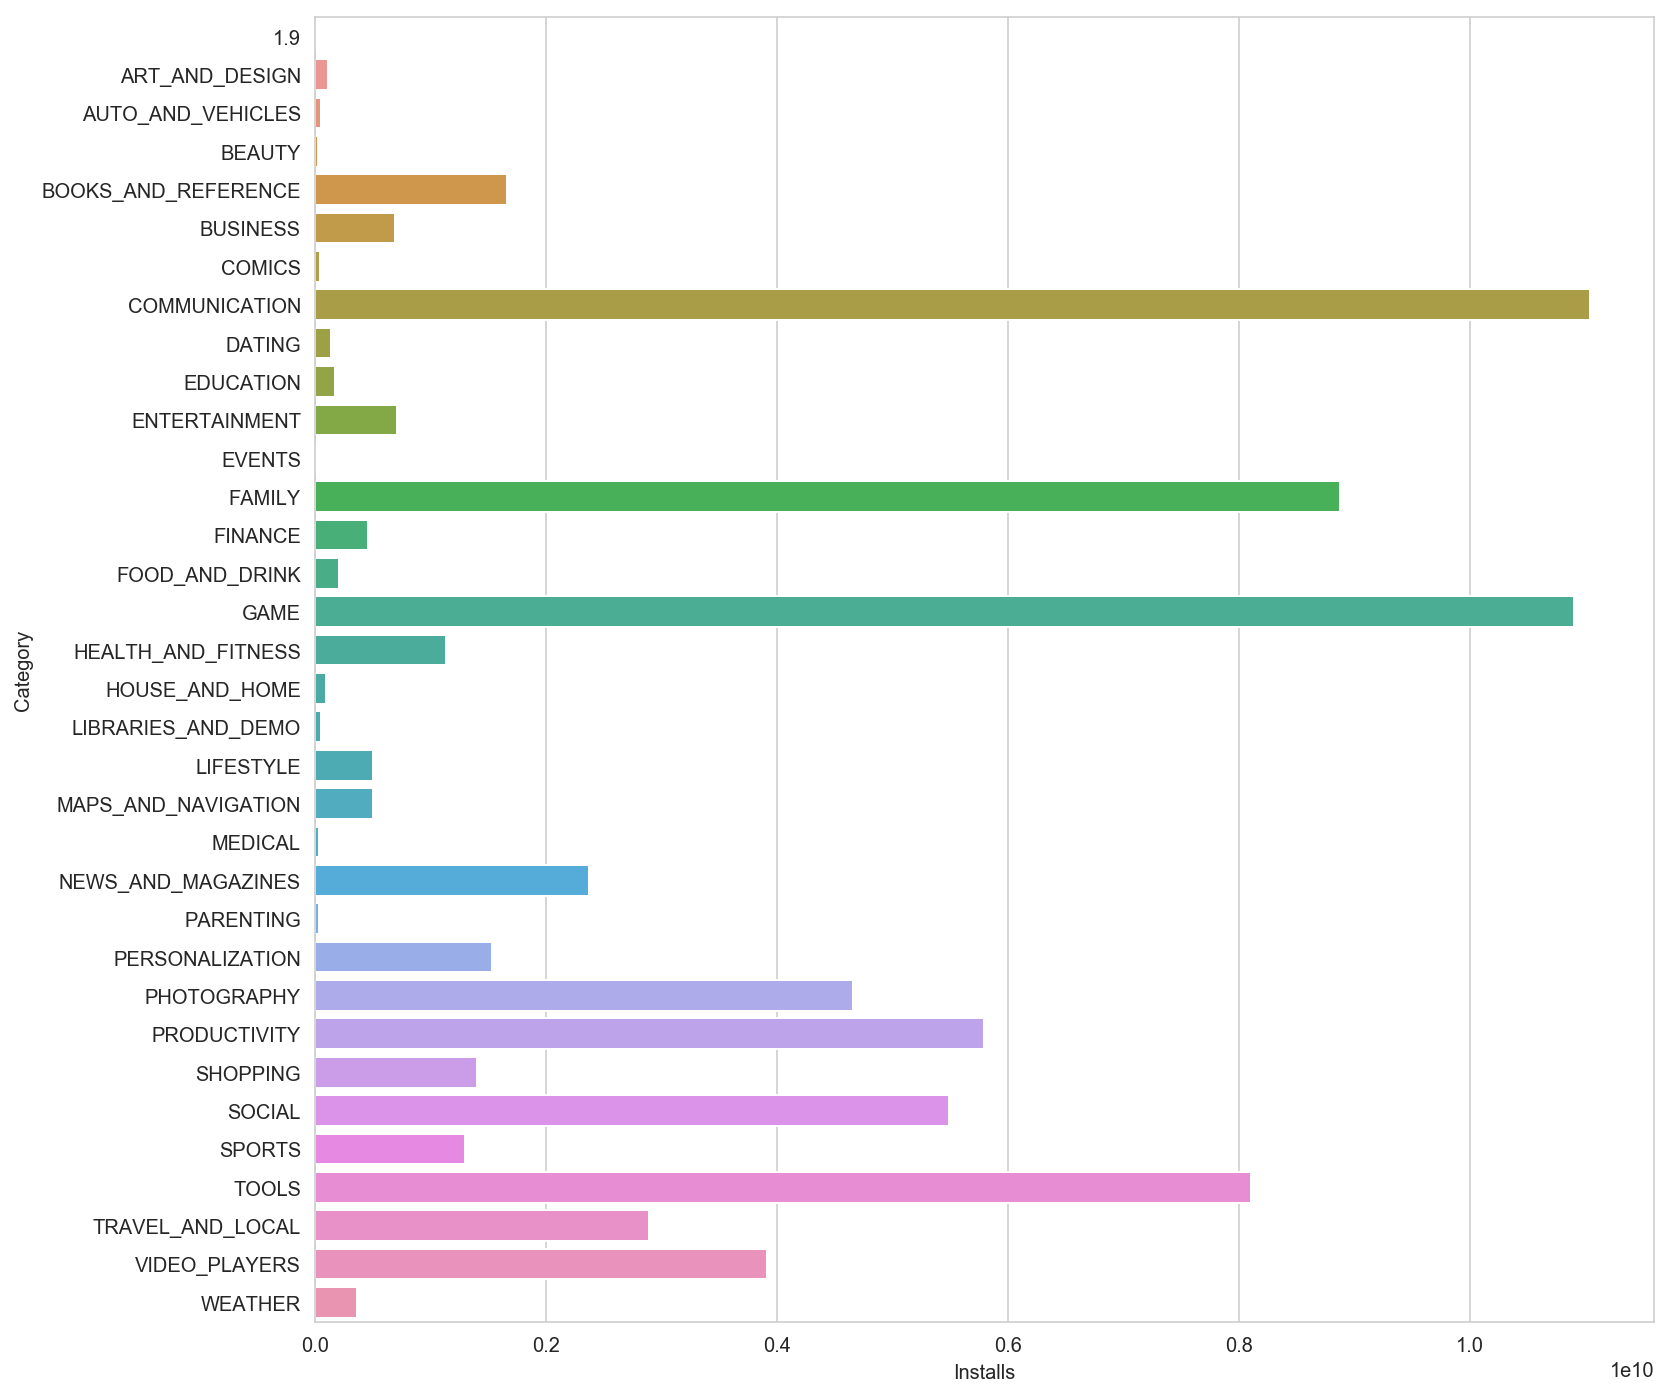

In [46]:
plt.subplots(figsize=(12,12))
sns.barplot(y=top_installs.index, x = top_installs['Installs'])

It appear that there is 1 that beyond Game, Family and Tools: Communication, look up above and we can find that Communication just ranked 11 on the top most appearances, but people actually use them a lot.

So what about type? People usually installs Free app rather than Paid app right?

In [54]:
apps.groupby('Type')['Installs'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,8904.0,8.448705e+06,5.595428e+07,0.0,1000.0,100000.0,1000000.0,1.000000e+09
Paid,754.0,7.607929e+04,5.396857e+05,0.0,100.0,1000.0,10000.0,1.000000e+07


There are just 754 paid apps, not a huge number. (~8%). So how about Installs? 8448705 and 76079 in mean installs, but 1000000 and 10000 when it come to 75%. So i can say that people really like free app than paid app, because its free :D

In [53]:
apps.groupby('PriceBand')['Installs'].describe()

,count,mean,std,min,25%,50%,75%,max
PriceBand,,,,,,,,
Cheap,145.0,1.337060e+05,8.568235e+05,1.0,10.0,500.0,5000.0,1.000000e+07
Expensive,105.0,1.452752e+05,9.863645e+05,0.0,100.0,1000.0,10000.0,1.000000e+07
Free,8904.0,8.448705e+06,5.595428e+07,0.0,1000.0,100000.0,1000000.0,1.000000e+09
Normal,158.0,3.702861e+04,1.010776e+05,0.0,1000.0,5000.0,50000.0,1.000000e+06
Not cheap,293.0,5.597445e+04,1.775773e+05,0.0,100.0,1000.0,10000.0,1.000000e+06
Ridiculously expensive,29.0,7.697448e+03,2.014656e+04,0.0,10.0,1000.0,5000.0,1.000000e+05
Too expensive,24.0,1.034379e+04,2.362724e+04,1.0,77.5,1000.0,10000.0,1.000000e+05


So in case you have to push a price tag to your app, it better to be in 2.99 & 4.99 dollar (Normal price band)

In [52]:
apps.groupby('Content Rating')['Installs'].describe()

,count,mean,std,min,25%,50%,75%,max
Content Rating,,,,,,,,
Adults only 18+,3.0,6.666667e+05,2.886751e+05,500000.0,500000.0,500000.0,750000.0,1.000000e+06
Everyone,7903.0,6.622935e+06,4.671218e+07,0.0,1000.0,50000.0,1000000.0,1.000000e+09
Everyone 10+,321.0,1.251175e+07,6.508344e+07,5.0,50000.0,1000000.0,5000000.0,1.000000e+09
Mature 17+,393.0,6.203529e+06,2.969997e+07,1.0,10000.0,500000.0,1000000.0,5.000000e+08
Teen,1036.0,1.591436e+07,9.268921e+07,0.0,10000.0,500000.0,5000000.0,1.000000e+09
Unrated,2.0,2.525000e+04,3.500179e+04,500.0,12875.0,25250.0,37625.0,5.000000e+04


So "Everyone" have a larger number of apps, but most of its apps have smaller installs than "Everyone 10+" and "Teen"

In [56]:
apps.groupby('Android Ver')['Installs'].describe()

,count,mean,std,min,25%,50%,75%,max
Android Ver,,,,,,,,
1.0 and up,2.0,3.000000e+04,2.828427e+04,10000.0,2.000000e+04,30000.0,40000.0,5.000000e+04
1.5 and up,22.0,1.084214e+06,2.463245e+06,10.0,1.000000e+03,10000.0,875000.0,1.000000e+07
1.6 and up,116.0,4.001177e+05,1.520945e+06,1.0,4.000000e+02,5000.0,50000.0,1.000000e+07
2.0 and up,32.0,1.109778e+06,2.631273e+06,10.0,4.000000e+03,30000.0,500000.0,1.000000e+07
2.0.1 and up,7.0,1.443858e+07,3.773083e+07,10.0,5.025000e+03,10000.0,525000.0,1.000000e+08
2.1 and up,133.0,2.372340e+06,7.781766e+06,1.0,1.000000e+03,50000.0,1000000.0,5.000000e+07
2.2 - 7.1.1,1.0,1.000000e+02,NaN,100.0,1.000000e+02,100.0,100.0,1.000000e+02
2.2 and up,239.0,4.056955e+05,1.627457e+06,5.0,1.000000e+03,10000.0,100000.0,1.000000e+07
2.3 and up,615.0,2.469295e+06,1.075912e+07,1.0,5.000000e+03,100000.0,1000000.0,1.000000e+08


Seem like Android ver doesnt affect installs so much. Because the latest version of android is 8.0 (at the time this data being collected), so not all of the devices has been updated.

To summary, if you want your app to have a high value of installs. It better to be a "Free" or "Normal Price" app, in the category of Communication, Game, Family or Tools, and have the content rating of "Everyone 10+", "Teen".

But wait, do you think "Last Updated" can affect the number of installs? Lets calculate the different in weeks of the last updated of apps, and last updated of the whole data: Sun Feb 03 2019 20:55:47 GMT+0700 (Indochina Time but note that we will convert them to month so its not neccessary to care about time zone, and time, just need date).

In [71]:
from datetime import date
data_date = date(year = 2019, month = 2, day = 3)

def converter(app_date):
    return int((data_date - app_date.date()).days / 30)

apps['Last Updated In'] = apps['Last Updated'].apply(converter)

In [75]:
apps['Last Updated In'].describe()

count    9658.000000
mean       14.888797
std        13.532523
min         5.000000
25%         6.000000
50%         9.000000
75%        18.000000
max       106.000000
Name: Last Updated In, dtype: float64

The most updated app is updated in 5 months? I think last updated has nothing to do with installs.

How about... say, the number of words of the app's name?

In [100]:
def count_words(s):
    data = len(s.split(' '))
    if data < 5:
        value = "< 5"
    elif data < 10:
        value = "< 10"
    elif data < 15:
        value = "< 15"
    elif data < 20:
        value = "< 20"
    else:
        value = "> 20"
    return value

apps['Words'] = apps['App'].apply(count_words)

In [108]:
apps.groupby("Words")['Installs'].describe()

,count,mean,std,min,25%,50%,75%,max
Words,,,,,,,,
< 10,3014.0,8.182152e+06,5.121909e+07,0.0,10000.0,100000.0,1000000.0,1.000000e+09
< 15,109.0,4.259936e+06,1.494502e+07,10.0,10000.0,100000.0,1000000.0,1.000000e+08
< 20,6.0,2.025000e+06,3.921957e+06,50000.0,200000.0,500000.0,875000.0,1.000000e+07
< 5,6526.0,7.683902e+06,5.535320e+07,0.0,1000.0,50000.0,1000000.0,1.000000e+09
> 20,3.0,6.666700e+05,5.773445e+05,10.0,500005.0,1000000.0,1000000.0,1.000000e+06


Most of apps have less than 5 words in their name, and seems like the number of words does not affect installs.

## How to get higher rating on Play Store?

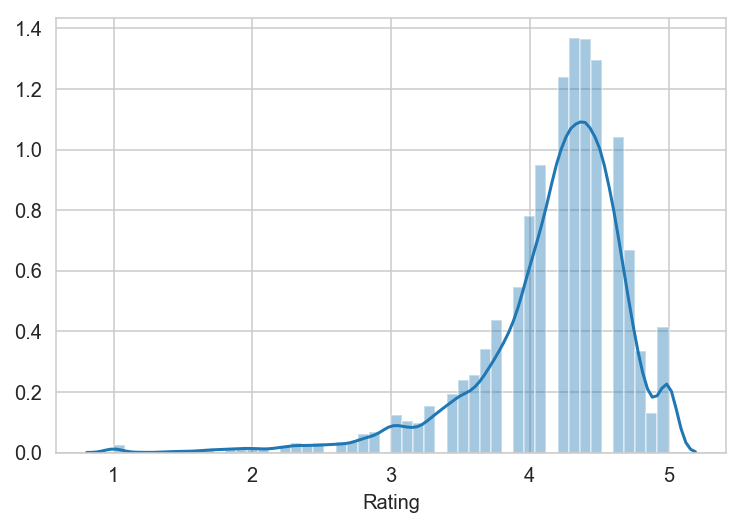

In [50]:
sns.distplot(apps[apps['Rating'].notna()]['Rating'])

Average of rating of applications in store is around ~4.3 which is very high

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
1.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ART_AND_DESIGN,59.0,4.359322,0.359654,3.2,4.100,4.4,4.700,5.0
AUTO_AND_VEHICLES,73.0,4.190411,0.543692,2.1,4.000,4.3,4.600,4.9
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.3,4.575,4.9
BOOKS_AND_REFERENCE,169.0,4.344970,0.437649,2.7,4.100,4.5,4.600,5.0
BUSINESS,262.0,4.096565,0.660393,1.0,3.800,4.2,4.500,5.0
COMICS,54.0,4.181481,0.526317,2.8,3.900,4.4,4.500,5.0
COMMUNICATION,257.0,4.121401,0.469343,1.0,4.000,4.2,4.400,5.0
DATING,133.0,3.980451,0.628907,1.0,3.600,4.1,4.400,5.0


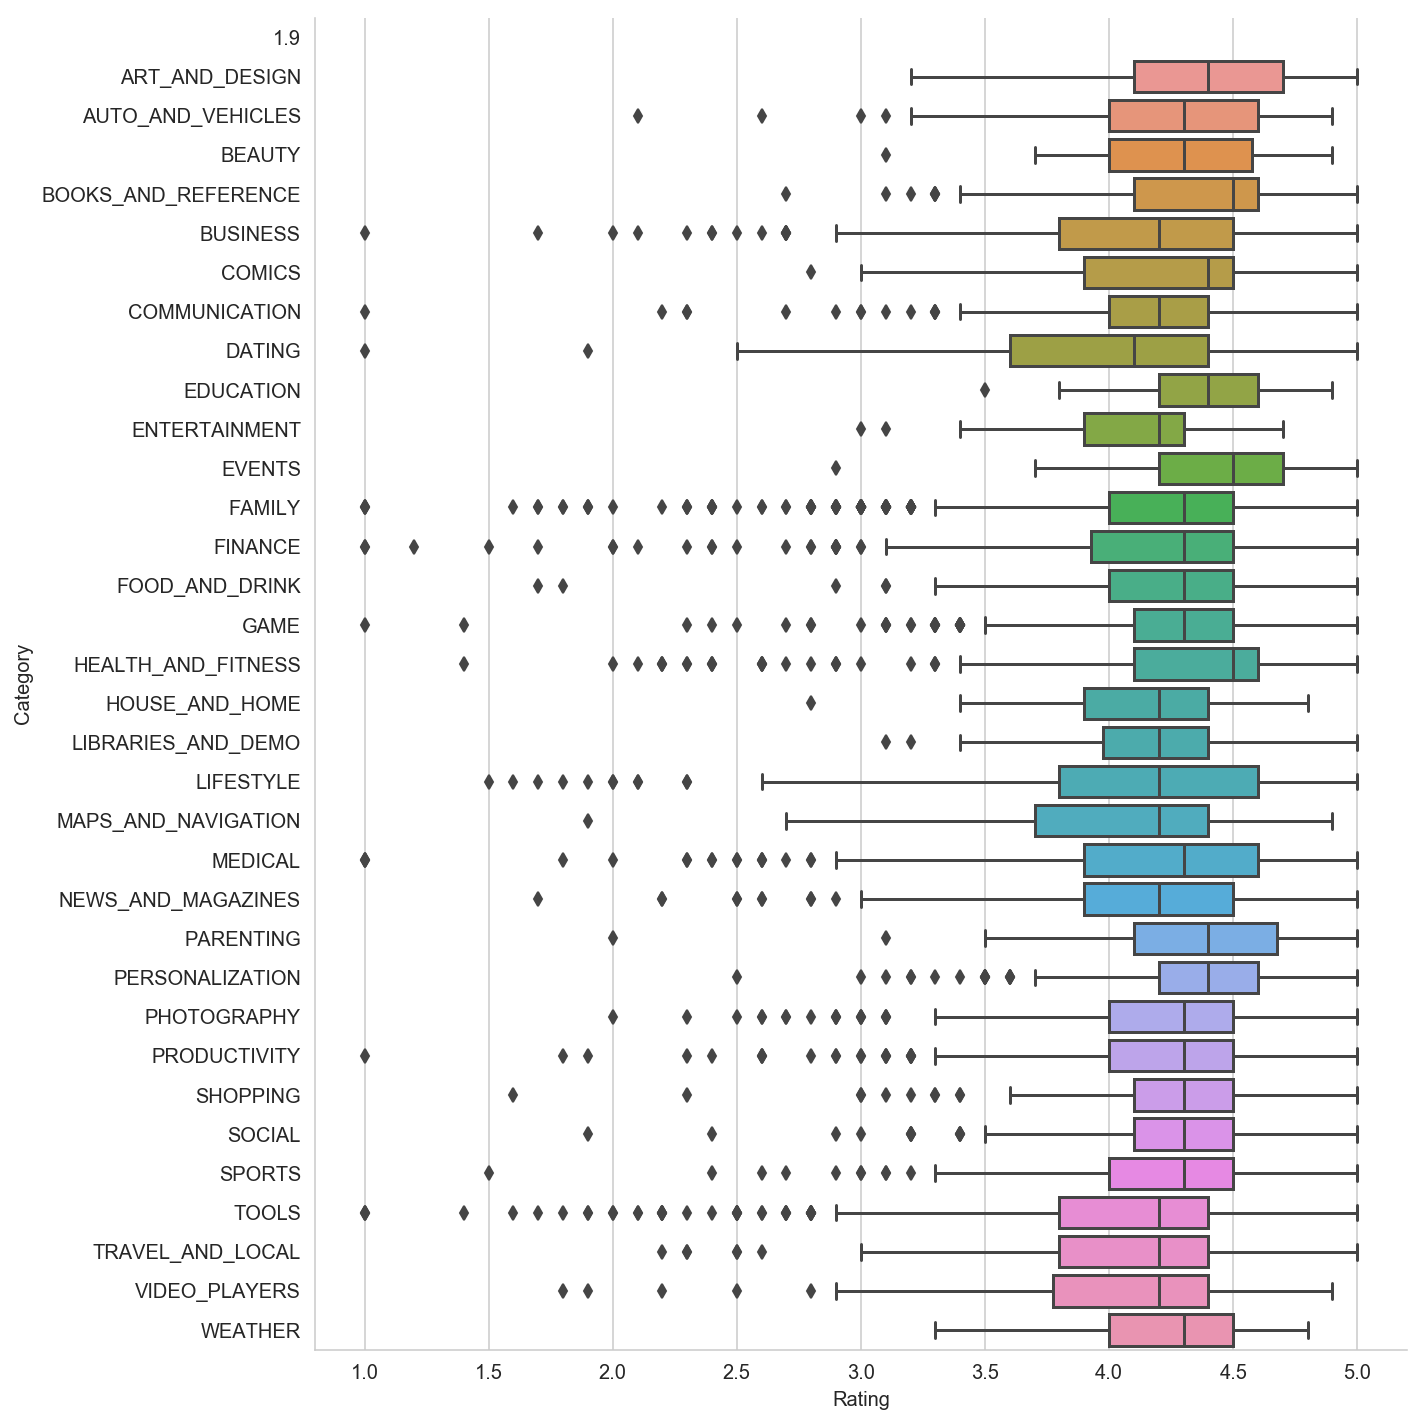

In [51]:
apps.groupby('Category')['Rating'].describe()
sns.catplot(y="Category", x="Rating", data=apps, kind="box", height = 10)

Rating of application in each category is not different too much but seem like Event, Art & Design, Parenting are a little bit higher than the others.

You should have know that the higher install, the higher review, but installs in this data is not so continous, so we can use review as well since they speak the same thing.

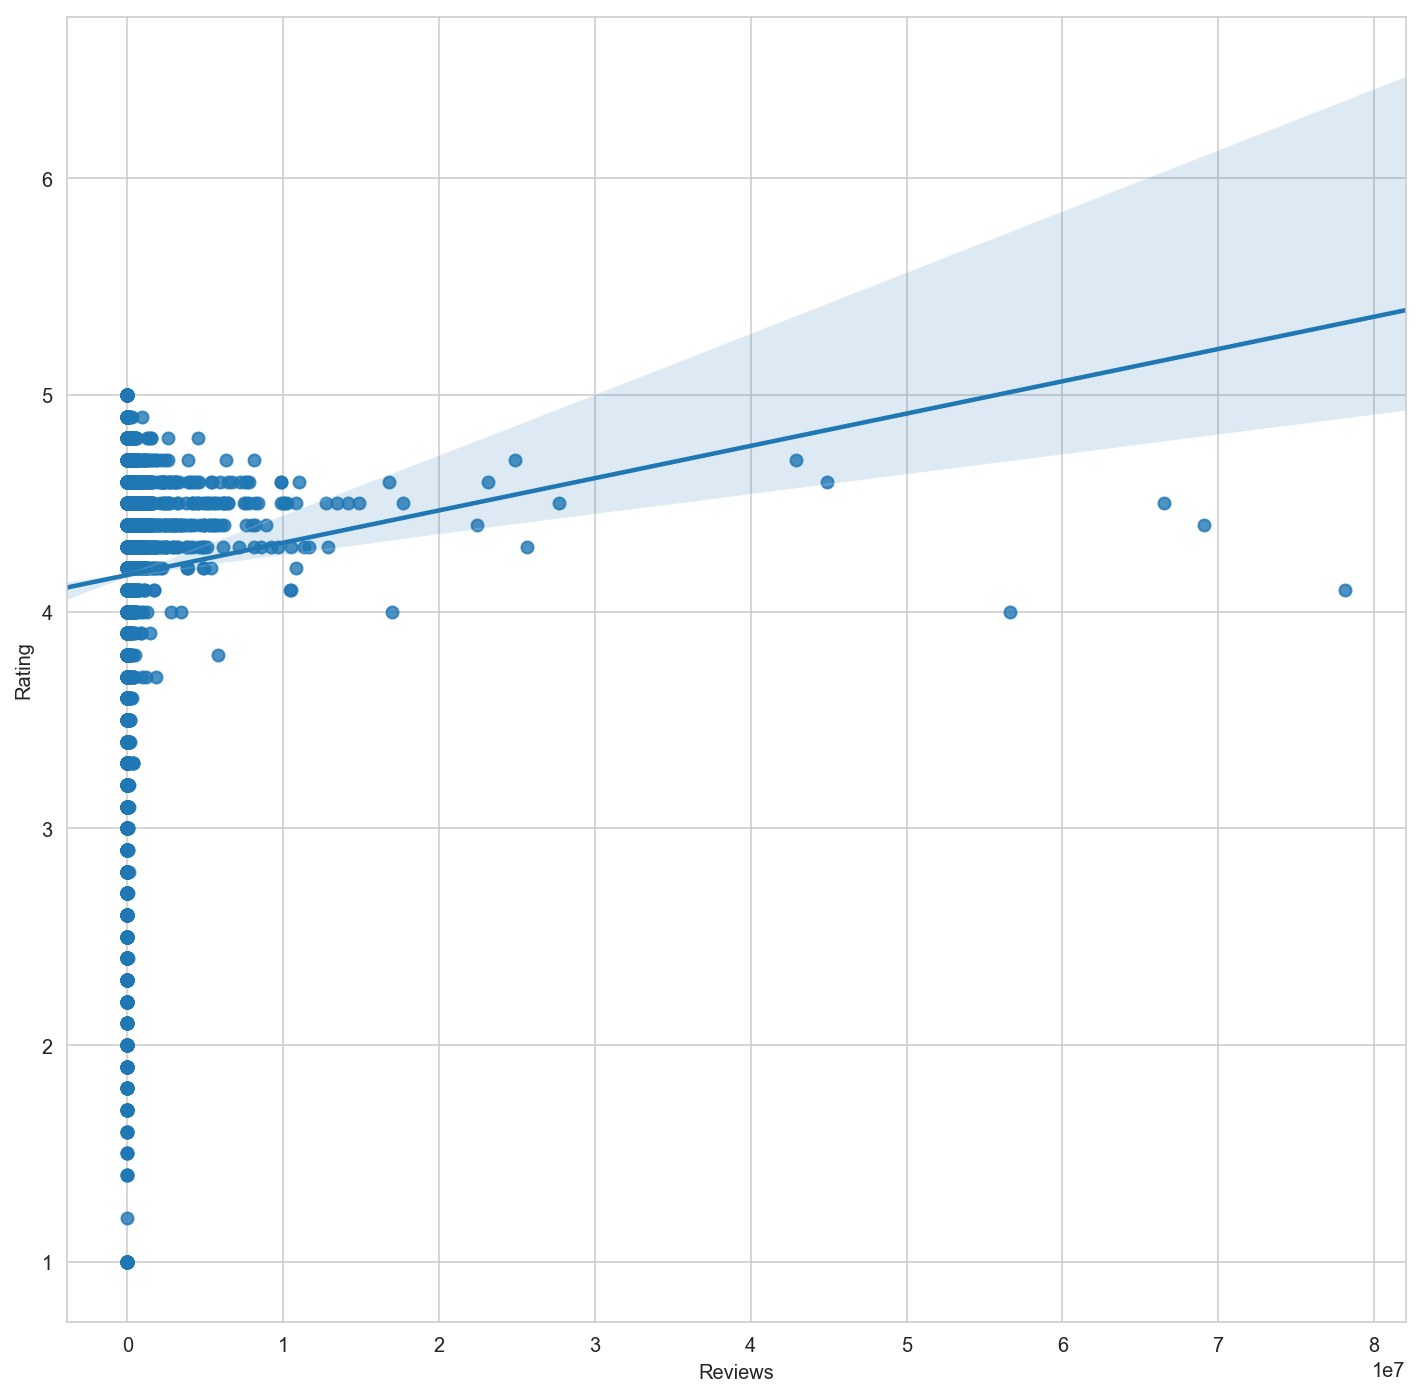

In [113]:
plt.figure(figsize = (12,12))
sns.regplot(x="Reviews", y="Rating", data=apps);

Seem like well-known apps will get good ratings

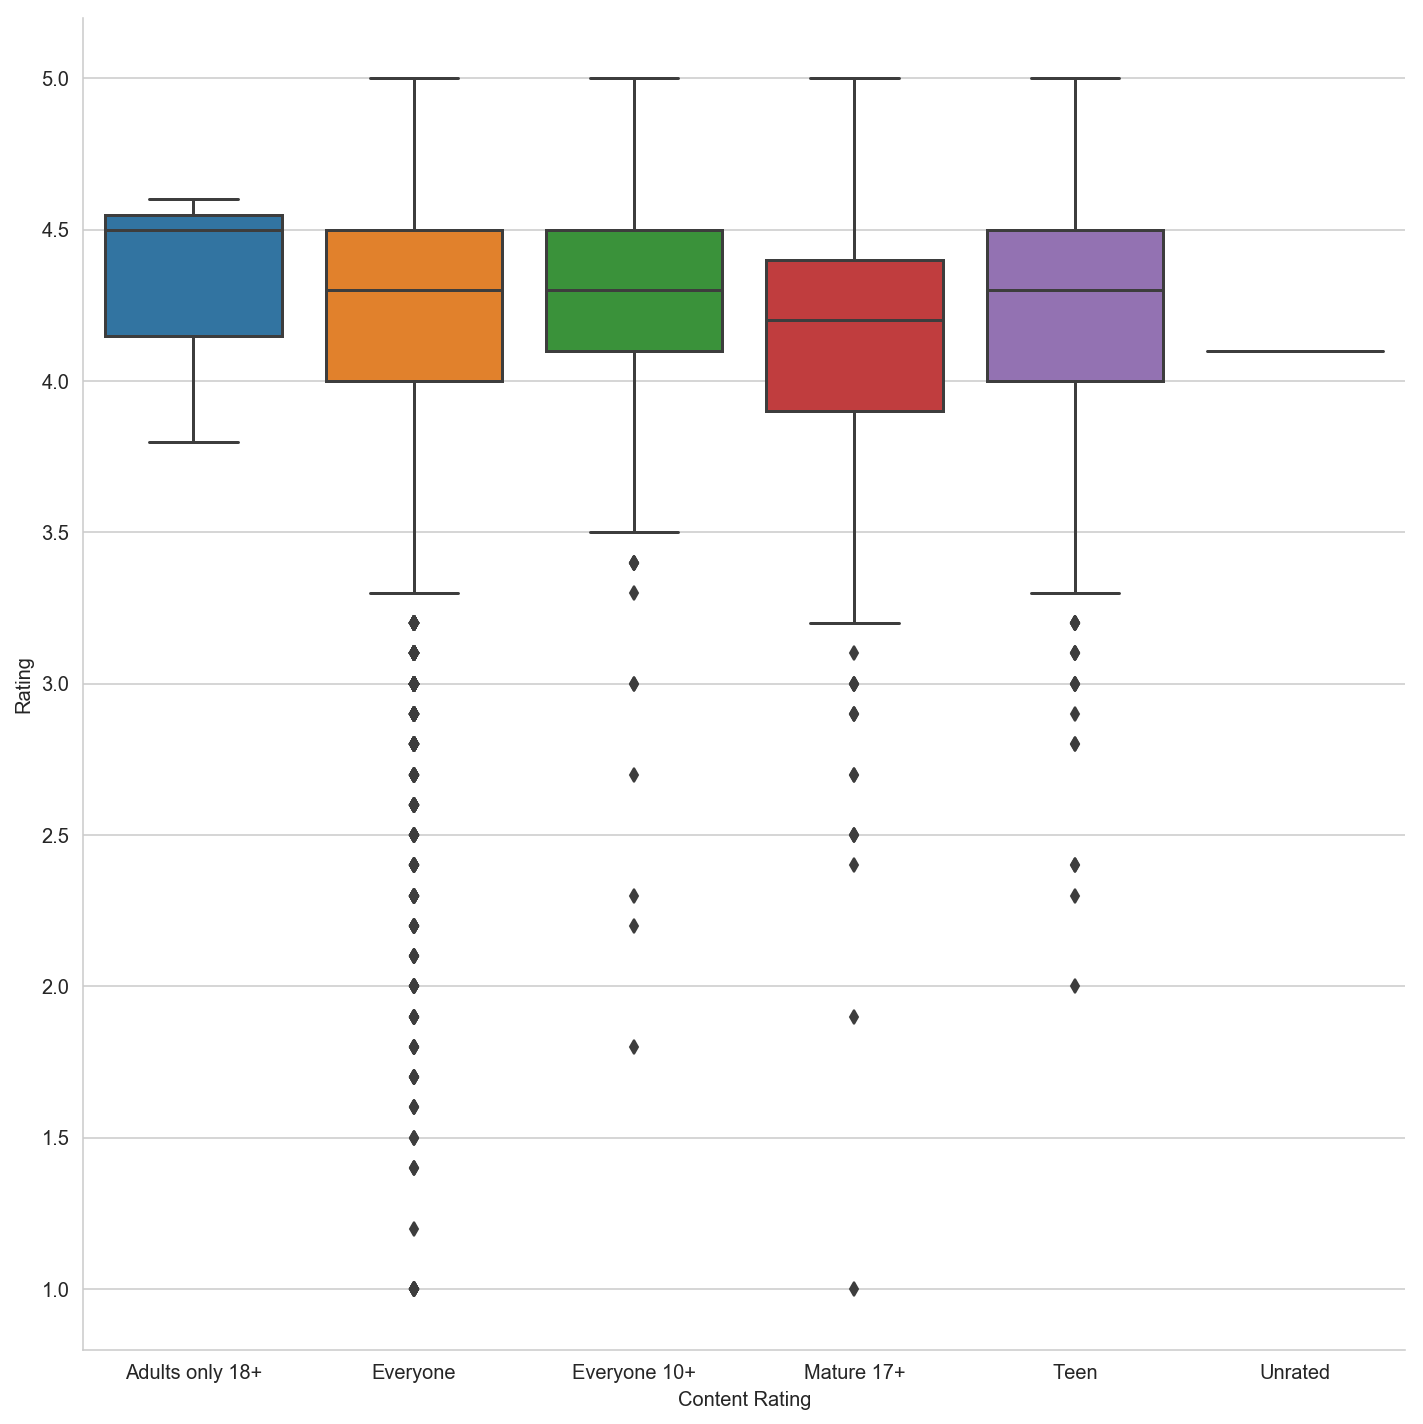

In [119]:
sns.catplot(x="Content Rating", y="Rating", data=apps, kind="box", height = 10)

Content Rating not effect too much to rating, but in "Adults only 18+" apps, look like they get lower rating than others.

In [120]:
apps.groupby('Type')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,7594.0,4.166171,0.534016,1.0,4.0,4.3,4.5,5.0
Paid,602.0,4.262126,0.556756,1.0,4.1,4.4,4.6,5.0


Look like there is no different in rating between free and paid, but lets dig a little bit deeper.

In [122]:
apps.groupby('PriceBand')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
PriceBand,,,,,,,,
Cheap,104.0,4.298077,0.534623,2.3,4.100,4.40,4.600,5.0
Expensive,76.0,4.255263,0.454429,2.6,4.100,4.40,4.600,4.8
Free,7594.0,4.166171,0.534016,1.0,4.000,4.30,4.500,5.0
Normal,148.0,4.237838,0.601065,1.7,4.100,4.40,4.600,5.0
Not cheap,237.0,4.293671,0.568825,1.0,4.200,4.40,4.600,5.0
Ridiculously expensive,19.0,3.910526,0.394257,2.9,3.700,4.00,4.150,4.6
Too expensive,18.0,4.238889,0.607927,2.9,3.875,4.45,4.675,5.0


Seems like apps come with a ridiculously expensive price tag will have a lower rating. So, try not to overprice your app :D

In [124]:
apps.groupby('Content Rating')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Content Rating,,,,,,,,
Adults only 18+,3.0,4.300000,0.435890,3.8,4.15,4.5,4.55,4.6
Everyone,6618.0,4.166289,0.558246,1.0,4.00,4.3,4.50,5.0
Everyone 10+,305.0,4.225902,0.399364,1.8,4.10,4.3,4.50,5.0
Mature 17+,357.0,4.121849,0.509322,1.0,3.90,4.2,4.40,5.0
Teen,912.0,4.225658,0.404095,2.0,4.00,4.3,4.50,5.0
Unrated,1.0,4.100000,NaN,4.1,4.10,4.1,4.10,4.1


Content Rating didn't make it, too.